In [1]:

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

import tensorflow.keras.utils
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping


from google.colab import auth
from google.colab import drive
auth.authenticate_user()
drive.mount('/content/gdrive')
path = '/content/gdrive/MyDrive/Colab Notebooks/DACON_CV_award/data/'

Mounted at /content/gdrive


In [2]:
train_data = pd.read_csv(path+'train.csv')
test_data  = pd.read_csv(path+'test.csv')
sub_data   = pd.read_csv(path+'submission.csv')

In [3]:
def x_data(data):
    cols = [ col for col in data.columns if col in ['id', 'digit', 'letter']]
    x = data.drop(cols, axis=1).values
    x = x.reshape(-1, 28, 28, 1)
    x = x/255
    return x

def one_hot_encoding(data):
    y = data['digit']
    y_train = np.zeros((len(y), len(y.unique())))
    for i, digit in enumerate(y):
        y_train[i, digit] = 1
    return y_train

In [4]:
x_train = x_data(train_data)
x_test  = x_data(test_data)
y_train = one_hot_encoding(train_data)

In [5]:
model = Sequential()
model.add( Conv2D( 32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1) ) )
model.add( BatchNormalization() )
model.add( Dropout(0.2) )

model.add( Conv2D( 128, kernel_size=(3,3), activation='relu') )
model.add( Dropout(0.2) )

model.add( Conv2D( 128, kernel_size=(3,3), activation='relu') )
model.add( Conv2D( 64, kernel_size=(3,3), activation='relu') )
model.add( MaxPooling2D(pool_size=(2,2)) )
model.add( Flatten() )

model.add( Dense( 32, activation='relu') )
model.add( Dense( 10, activation='softmax') )

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       36992     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 128)       147584    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 64)        7

In [7]:
model.compile( loss='categorical_crossentropy',
               optimizer='adam',metrics=['accuracy'])

early_stopping = EarlyStopping(patience=20)
hist = model.fit( x_train, y_train, epochs=100, batch_size=40)


Epoch 1/100
52/52 [==============================] - 32s 13ms/step - loss: 2.1428 - accuracy: 0.2056
Epoch 2/100
52/52 [==============================] - 1s 10ms/step - loss: 1.6008 - accuracy: 0.4424
Epoch 3/100
52/52 [==============================] - 0s 10ms/step - loss: 1.2573 - accuracy: 0.5825
Epoch 4/100
52/52 [==============================] - 1s 10ms/step - loss: 0.9418 - accuracy: 0.7021
Epoch 5/100
52/52 [==============================] - 1s 10ms/step - loss: 0.7449 - accuracy: 0.7617
Epoch 6/100
52/52 [==============================] - 1s 10ms/step - loss: 0.5848 - accuracy: 0.8130
Epoch 7/100
52/52 [==============================] - 0s 10ms/step - loss: 0.4527 - accuracy: 0.8457
Epoch 8/100
52/52 [==============================] - 0s 10ms/step - loss: 0.3692 - accuracy: 0.8770
Epoch 9/100
52/52 [==============================] - 1s 10ms/step - loss: 0.3043 - accuracy: 0.9019
Epoch 10/100
52/52 [==============================] - 1s 10ms/step - loss: 0.2486 - accuracy: 0.918

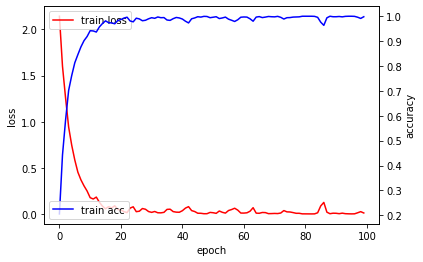

In [8]:
fig, lss = plt.subplots()
acc = lss.twinx()

lss.plot(hist.history['loss'],    'r', label='train loss')
acc.plot(hist.history['accuracy'],'b', label='train acc')

lss.set_xlabel('epoch')
lss.set_ylabel('loss')
acc.set_ylabel('accuracy')

lss.legend(loc='upper left')
acc.legend(loc='lower left')

plt.show()

In [9]:
sub_data['digit'] = np.argmax(model.predict(x_test), axis=1)
sub_data.to_csv(path+'baseline.csv', index=False)